In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [2]:
df = pd.read_parquet(r"D:\Project\data nyc fare data\train.parquet")
df.drop(columns=['key','date'],inplace=True)

In [3]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.shape

(55423856, 7)

In [5]:
df.describe()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,55423856,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,2012-03-21 00:18:49.821667,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
min,-3.000000e+02,2009-01-01 00:00:27,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,2010-08-19 21:09:08.750000,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,2012-03-19 11:39:24.500000,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,2013-10-18 17:27:55.500000,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,2015-06-30 23:59:54,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02
std,2.071083e+01,NaN,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   fare_amount        float64       
 1   pickup_datetime    datetime64[us]
 2   pickup_longitude   float64       
 3   pickup_latitude    float64       
 4   dropoff_longitude  float64       
 5   dropoff_latitude   float64       
 6   passenger_count    int64         
dtypes: datetime64[us](1), float64(5), int64(1)
memory usage: 2.9 GB


In [7]:
df.isnull().sum()

fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [8]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
df['date'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['week_day'] = df['pickup_datetime'].dt.weekday

In [10]:
df['time_pickup'] = df['pickup_datetime'].dt.time
df['hour_pickup'] = df['pickup_datetime'].dt.hour

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,time_pickup,hour_pickup
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,0,17:26:21,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,1,16:52:16,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,3,00:35:00,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,5,04:30:42,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,1,07:51:00,7


In [12]:
df['date'].unique()

array([15,  5, 18, 21,  9,  6, 20,  4,  3,  2,  8, 24, 23, 19, 22,  7, 12,
       10, 28, 11, 29, 31,  1, 14, 16, 17, 27, 25, 30, 26, 13],
      dtype=int32)

In [13]:
df['month'].unique()

array([ 6,  1,  8,  4,  3, 11, 12,  9,  7,  2,  5, 10], dtype=int32)

In [14]:
df['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int32)

In [15]:
df['year'].value_counts()

year
2012    8919666
2011    8841346
2013    8655190
2009    8543166
2010    8354997
2014    8252682
2015    3856809
Name: count, dtype: int64

<Axes: xlabel='week_day'>

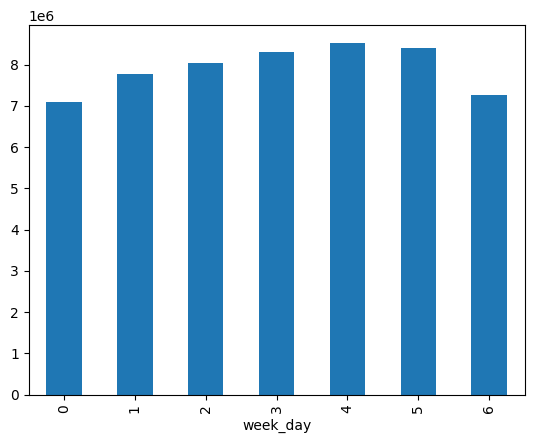

In [16]:
df['week_day'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='month'>

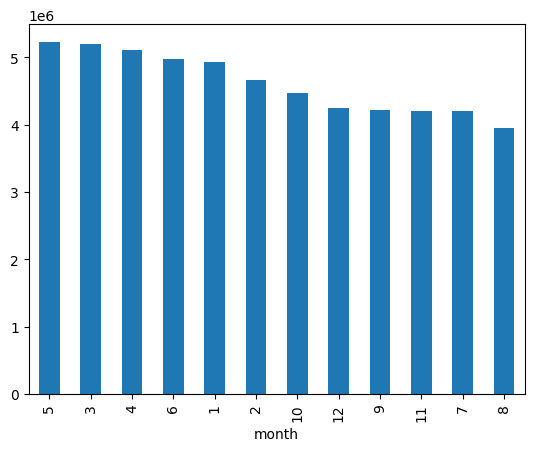

In [17]:
df['month'].value_counts().plot(kind='bar')

<Axes: xlabel='passenger_count'>

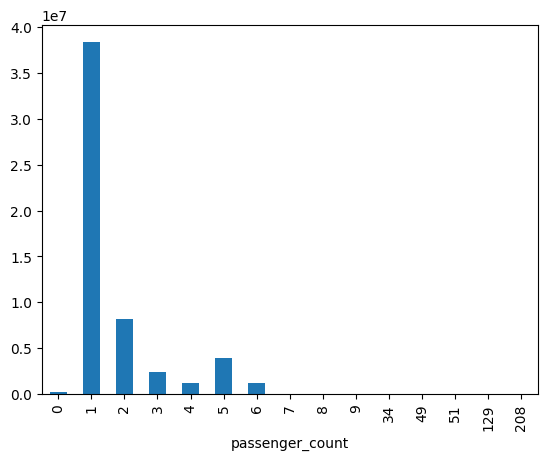

In [18]:
df['passenger_count'].value_counts().sort_index().plot(kind='bar')

In [19]:
df = df[df['passenger_count'] <= 9]
df.reset_index(drop=True,inplace=True)

In [20]:
df.shape

(55423787, 13)

In [21]:
df = df[df['fare_amount']>=0]
df.shape

(55421333, 13)

In [22]:
df = df[
    (df['pickup_longitude'] != 0.0) &
    (df['pickup_latitude'] != 0.0) &
    (df['dropoff_longitude'] != 0.0) &
    (df['dropoff_latitude'] != 0.0)
]


In [23]:
df.shape

(54317131, 13)

Quick Googling gave me this info

- Latitudes range from -90 to 90.

- Longitudes range from -180 to 180.

- The above describe clearly shows some outliers. Let's filter them

In [24]:
df = df[df['pickup_latitude'].between(-90,90) & df['dropoff_latitude'].between(-90,90)]
df.shape[0]

54315498

In [25]:
df = df[df['pickup_longitude'].between(-180,180) & df['dropoff_longitude'].between(-180,180)]
df.shape[0]

54314370

In [26]:
R = 6371

# Define the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Distance in kilometers
    return R * c

In [27]:
df['haversine_dist'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
df.reset_index(drop=True,inplace=True)
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,time_pickup,hour_pickup,haversine_dist
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,0,17:26:21,17,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,1,16:52:16,16,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,3,00:35:00,0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,5,04:30:42,4,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,1,07:51:00,7,1.999157


In [28]:
df['fare_amount'].describe()

count    5.431437e+07
mean     1.132882e+01
std      2.082694e+01
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

In [39]:
df['haversine_dist'].describe()*0.01

count    543143.700000
mean          0.044350
std           0.765393
min           0.000000
25%           0.012531
50%           0.021531
75%           0.039126
max         196.888006
Name: haversine_dist, dtype: float64

In [35]:
df.shape

(54314370, 14)

In [34]:
print(df[df['haversine_dist'] == 0].shape[0])
df[df['haversine_dist'] == 0]

577277


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,week_day,time_pickup,hour_pickup,haversine_dist
102,52.0,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1,25,3,2009,2,00:08:52,0,0.0
187,6.5,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1,8,1,2014,2,21:55:58,21,0.0
264,7.5,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1,25,8,2012,5,01:53:42,1,0.0
283,6.9,2009-12-14 12:33:00,-73.982432,40.745747,-73.982432,40.745747,1,14,12,2009,0,12:33:00,12,0.0
386,12.0,2014-03-12 18:12:44,-73.844904,40.736318,-73.844904,40.736318,1,12,3,2014,2,18:12:44,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54313460,6.0,2014-09-24 10:46:00,-73.965620,40.778082,-73.965620,40.778082,3,24,9,2014,2,10:46:00,10,0.0
54313513,6.1,2012-08-14 18:58:00,-73.968342,40.755202,-73.968342,40.755202,1,14,8,2012,1,18:58:00,18,0.0
54313673,8.0,2013-03-28 07:29:00,-73.990557,40.768170,-73.990557,40.768170,1,28,3,2013,3,07:29:00,7,0.0
54313682,8.5,2012-10-11 10:33:00,-73.975653,40.754985,-73.975653,40.754985,1,11,10,2012,3,10:33:00,10,0.0


In [37]:
df[df['haversine_dist'] == 0]['passenger_count'].value_counts().sort_index()

passenger_count
0       475
1    409898
2     76610
3     24160
4     11578
5     45176
6      9378
9         2
Name: count, dtype: int64

desc = df.describe()

###### Convert scientific notation to float (rounded to 2 decimals)
desc = desc.applymap(lambda x: '{:.2f}'.format(x))
desc

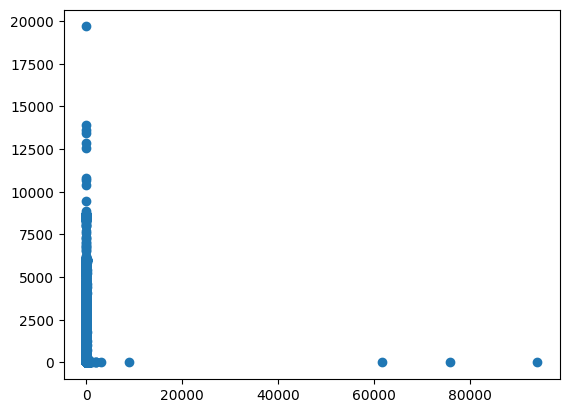

In [31]:
plt.scatter(data=df,y='haversine_dist',x='fare_amount')
plt.show()

In [47]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'month', 'year', 'week_day', 'time_pickup', 'hour_pickup',
       'haversine_dist'],
      dtype='object')

In [41]:
df.groupby('passenger_count')[['fare_amount','haversine_dist']].agg('mean')

,fare_amount,haversine_dist
passenger_count,,
0,8.965139,2.855884
1,11.198511,4.323803
2,11.818358,4.404607
3,11.524645,4.441046
4,11.746344,4.377041
5,11.211414,4.812117
6,12.125560,7.317356
7,35.679231,5.168661
8,37.047143,3.502851


In [43]:
df.groupby('hour_pickup')[['fare_amount','haversine_dist']].agg('mean')

,fare_amount,haversine_dist
hour_pickup,,
0,11.674317,4.839735
1,11.408882,4.799732
2,11.392323,4.781570
3,11.852275,4.827676
4,13.581843,5.334374
5,15.149202,6.267487
6,12.158121,5.114029
7,10.976930,4.529344
8,10.938716,4.070032


In [46]:
df.groupby('week_day')[['fare_amount','haversine_dist']].agg('mean')

,fare_amount,haversine_dist
week_day,,
0,11.360807,4.504913
1,11.192074,4.380484
2,11.293080,4.338435
3,11.477233,4.428462
4,11.404290,4.373056
5,10.975744,4.377724
6,11.633680,4.678397
